# Flare Analysis 🔥

## About this file
*These datasets are meteorological data from the HI-SEAS weather station from four months (September through December 2016) between Mission IV and Mission V.*

### Types
- A row number (1-n) useful in sorting this export's results.
- The UNIX time_t date (seconds since Jan 1, 1970). Useful in sorting this export's results with other export's results.
- The **date** in **yyyy-mm-dd** format.
- The **local time of day** in **hh:mm:ss 24-hour** format.
- The **numeric** data, if any (may be an empty string).
- The **text** data, if any (may be an empty string).

### Units
- Solar radiation: **watts per meter^2**
- Temperature: **degrees Fahrenheit**
- Humidity: **percent**
- Barometric pressure: **Hg**
- Wind direction: **degrees**
- Wind speed: **miles per hour**
- Sunrise/sunset: **Hawaii time**

## 1. Import of the libraries

In [1]:
!pip install pandas sklearn seaborn

## 2. Reworking the data 
### Loading the dataset

In [2]:
import pandas as pd

df = pd.read_csv('SolarPrediction.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


#### Renaming some columns

In [3]:
df = df.rename(columns={"WindDirection(Degrees)": "WindDirection"})

#### Converting :
- `Temperature` from Fahrenheit into Kelvin (to stick to **SI units**) 
- `Speed` from mph in m/s
- `Data` has useless ***12:00:00 AM*** string, we can also get rid of the year, as every data is from ***2016*** `Data` becomes of form **MM/DD**


In [4]:
df['Temperature'] = df.apply(lambda x: round((x['Temperature']+459.67) * (5/9), 2),axis=1)
df['Speed'] = df.apply(lambda x: round(x['Speed'] / 2.237,  2),axis=1)
df['Data'] = pd.to_datetime(df['Data']).dt.strftime('%m/%d')
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection,Speed,TimeSunRise,TimeSunSet
0,1475229326,09/29,23:55:26,1.21,282.04,30.46,59,177.39,2.51,06:13:00,18:13:00
1,1475229023,09/29,23:50:23,1.21,282.04,30.46,58,176.78,1.51,06:13:00,18:13:00
2,1475228726,09/29,23:45:26,1.23,282.04,30.46,57,158.75,1.51,06:13:00,18:13:00
3,1475228421,09/29,23:40:21,1.21,282.04,30.46,60,137.71,1.51,06:13:00,18:13:00
4,1475228124,09/29,23:35:24,1.17,282.04,30.46,62,104.95,2.51,06:13:00,18:13:00


## 3. Plotting few key parameters

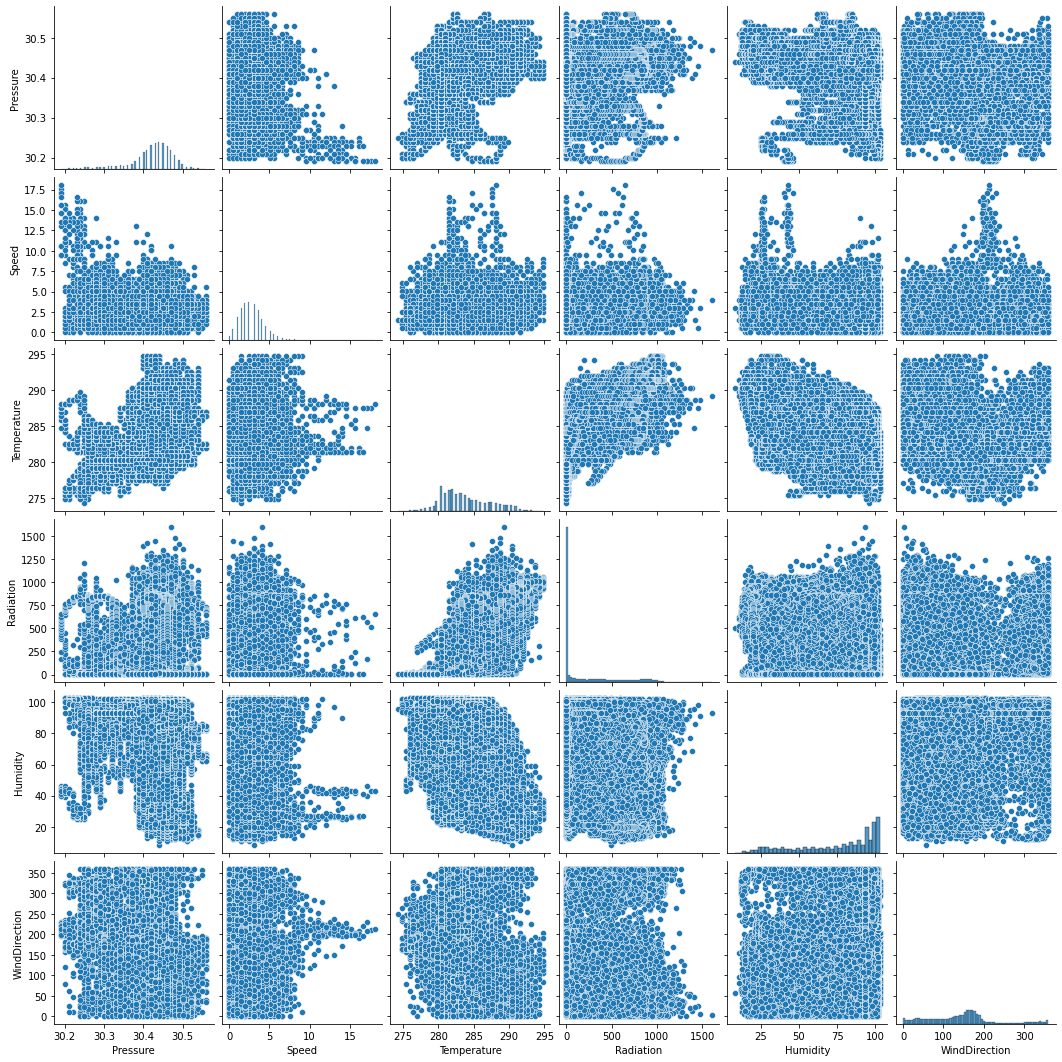

In [5]:
import seaborn as sns

sns.pairplot(df, vars=["Pressure", "Speed", "Temperature", "Radiation", "Humidity", "WindDirection"])

Not all of the plots are relevant, only :
- `Speed` vs `WindDirection`
- `Speed` vs `Humidity`  
- `Speed` vs `Radiation`  
 and so on

#### Now i want to know how many days, the dataset covers

In [6]:
df_day = df.sort_values('Data').groupby('Data')['Time'].nunique()
df_day

Data
09/01    250
09/02    279
09/03    282
09/04    280
09/05    281
        ... 
12/27    288
12/28    288
12/29    287
12/30    285
12/31    288
Name: Time, Length: 118, dtype: int64

#### And now, number of solar flares by day

<AxesSubplot:xlabel='Data', ylabel='Time'>

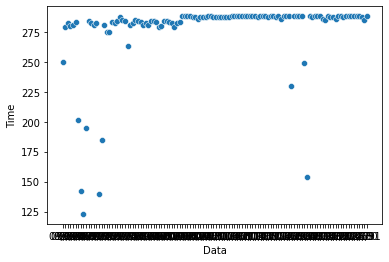

In [7]:
sns.scatterplot(data=df_day)

#### it is not really readable so let's isolate the days having less than `nb_flares`

In [8]:
nb_flares = 250

<AxesSubplot:xlabel='Data', ylabel='Time'>

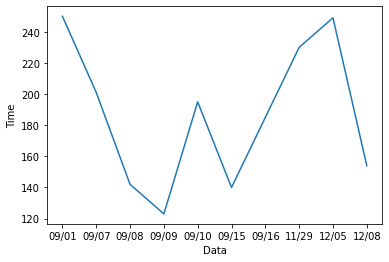

In [9]:
sns.lineplot(data=df_day.loc[df_day <= nb_flares])

#### The month of September was particularly "low" on solar flares.